In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mnist/mnist_train.csv")

In [3]:
data = df.to_numpy()
#one hot encoding of labels 0-9
labels = pd.get_dummies(df.label).to_numpy()
images = data[:,1:]
print(labels.shape, images.shape)

(60000, 10) (60000, 784)


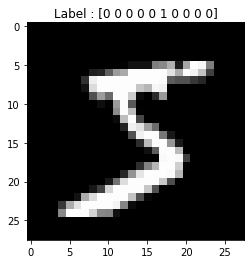

In [4]:
plt.imshow(images[0].reshape(28,28),'gray')
plt.title("Label : " + str(labels[0]))
plt.show()

In [5]:
#Softmax Activation Function
'''
We exponentiate the values to handle negative
Then we take probability or Normalize
clip the values to avoid divide by zero error. 1e-7 is close to zero
'''
def softmax(x):
    e = np.exp(np.clip(x, 1e-7,1-1e-7))
    return e/np.sum(e, axis=1, keepdims=True)

In [6]:
# Loss Function
'''
Idea is to take -log
'''
def lossSoftmax(softmaxScore):
    #
    a = np.multiply(softmaxScore,labels)
    b = np.sum(a,axis=1, keepdims=True)
    c = -np.log(b)
    return np.mean(c)

In [7]:
#Accuracy
def accuracyOfModel():
    return np.mean(np.argmax(score, axis=1) == df.label.to_numpy())

## Example

In [8]:
## Example
images = np.random.randint(0,10,(5,10))
images

array([[3, 5, 4, 9, 7, 2, 4, 7, 2, 9],
       [6, 1, 0, 2, 5, 7, 8, 3, 6, 7],
       [7, 0, 3, 9, 3, 7, 2, 3, 6, 2],
       [8, 3, 9, 6, 8, 8, 4, 5, 3, 6],
       [0, 0, 7, 9, 8, 5, 8, 4, 1, 3]])

In [9]:
# Example
df = pd.DataFrame({'label': [0,1,2,2,1]})
labels = pd.get_dummies(df.label).to_numpy()
labels

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [11]:
'''
f = wx+b
Weights and Bias initialization
multiply by 0.05 exp of minus(-) gives almost identical results
'''
w = 0.05 * np.random.randn(images.shape[1],labels.shape[1])
b = 0.05 * np.random.randn(1,labels.shape[1])
score = images.dot(w) + b
softmaxScore = softmax(score)
loss = lossSoftmax(softmaxScore)

In [15]:
images

array([[3, 5, 4, 9, 7, 2, 4, 7, 2, 9],
       [6, 1, 0, 2, 5, 7, 8, 3, 6, 7],
       [7, 0, 3, 9, 3, 7, 2, 3, 6, 2],
       [8, 3, 9, 6, 8, 8, 4, 5, 3, 6],
       [0, 0, 7, 9, 8, 5, 8, 4, 1, 3]])

In [12]:
w

array([[-0.00907057, -0.03904277, -0.00236844],
       [-0.00050847,  0.06035114, -0.00431887],
       [-0.00592322, -0.0322658 ,  0.04570372],
       [ 0.00520268,  0.04320695, -0.03260217],
       [-0.03302736,  0.09425869, -0.08948096],
       [ 0.0996144 ,  0.01182547,  0.04795952],
       [-0.03167958,  0.09596326, -0.01136417],
       [ 0.06682788, -0.05165079, -0.05160377],
       [ 0.06639948, -0.01523376,  0.02624864],
       [-0.05651688, -0.06063197, -0.01471576]])

In [13]:
b

array([[-0.05669238,  0.0072739 , -0.0349235 ]])

In [16]:
score

array([[-0.13005393,  0.58130467, -1.19130314],
       [ 0.38077087,  0.57078138, -0.42158871],
       [ 0.92957446,  0.21590167, -0.19001653],
       [ 0.44733938,  0.40961395, -0.49630286],
       [ 0.09324614,  1.34744599, -0.79969418]])

In [18]:
softmaxScore.shape

array([[0.26396577, 0.47206846, 0.26396577],
       [0.34571012, 0.41805422, 0.23623566],
       [0.53062686, 0.25992322, 0.20944993],
       [0.38427482, 0.37004793, 0.24567725],
       [0.22793372, 0.56442564, 0.20764063]])

In [21]:
loss

1.1486067546873553

## Training

In [8]:
'''
f = wx+b
Weights and Bias initialization
multiply by 0.05 exp of minus(-) gives almost identical results
'''
w = 0.05 * np.random.randn(images.shape[1],labels.shape[1])
b = 0.05 * np.random.randn(1,labels.shape[1])
score = images.dot(w) + b
softmaxScore = softmax(score)
loss = lossSoftmax(softmaxScore)

In [9]:
'''
Random Search of Weights and Biases
'''
for i in range(300):
    w1 = 0.05 * np.random.randn(images.shape[1],labels.shape[1])
    b1 = 0.05 * np.random.randn(1,labels.shape[1])
    score1 = images.dot(w1) + b1
    softmaxScore1 = softmax(score1)
    loss1 = lossSoftmax(softmaxScore1)
    if loss1<loss:
        w = w1
        b = b1
        score = score1
        loss=loss1
        print("Iteration :",i,"Accuracy :", accuracyOfModel(), "Loss :", loss)
        print("----------------------------------------------------------------")
print("!!!Completed!!!", "Accuracy :", accuracyOfModel(), "Loss :", loss)

Iteration : 0 Accuracy : 0.19525 Loss : 2.283129470322751
----------------------------------------------------------------
Iteration : 61 Accuracy : 0.17036666666666667 Loss : 2.259904483629741
----------------------------------------------------------------
!!!Completed!!! Accuracy : 0.17036666666666667 Loss : 2.259904483629741


In [10]:
'''
f = wx+b
Weights and Bias initialization
multiply by 0.05 exp of minus(-) gives almost identical results
'''
w = 0.05 * np.random.randn(images.shape[1],labels.shape[1])
b = 0.05 * np.random.randn(1,labels.shape[1])
score = images.dot(w) + b
softmaxScore = softmax(score)
loss = lossSoftmax(softmaxScore)

In [11]:
'''
Random Search of Weights and Biases but to increment current best known W and B
'''
for i in range(300):
    w1 = w + 0.05 * np.random.randn(images.shape[1],labels.shape[1])
    b1 = b + 0.05 * np.random.randn(1,labels.shape[1])
    score1 = images.dot(w1) + b1
    softmaxScore1 = softmax(score1)
    loss1 = lossSoftmax(softmaxScore1)
    if loss1<loss:
        w = w1
        b = b1
        score = score1
        softmaxScore = softmaxScore1
        loss=loss1
        #print("Iteration :",i,"Accuracy :", accuracyOfModel(), "Loss :", loss)
        #print("----------------------------------------------------------------")
print("!!!Completed!!!", "Accuracy :", accuracyOfModel(), "Loss :", loss)

!!!Completed!!! Accuracy : 0.34523333333333334 Loss : 2.031810926188324
